<h3>Context</h3>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
<p/>
<h3>Content</h3>

<p>Attribute Information:</p>
<ol>
<li>age</li>
<li>sex</li>
<li>chest pain type (4 values)</li>
<li>resting blood pressure</li>
<li>serum cholestoral in mg/dl</li>
<li>fasting blood sugar > 120 mg/dl</li>
<li>resting electrocardiographic results (values 0,1,2)</li>
<li>maximum heart rate achieved</li>
<li>exercise induced angina</li>
<li>oldpeak = ST depression induced by exercise relative to rest</li>
<li>the slope of the peak exercise ST segment</li>
<li>number of major vessels (0-3) colored by flourosopy</li>
<li>thal: 3 = normal; 6 = fixed defect; 7 = reversable defect</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/Ram Yadav/Downloads/data/datasets_33180_43520_heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<h3>Dimensions of Dataset</h3>

In [4]:
print('Number of rows in the dataset',df.shape[0])
print('Number of rows in the dataset',df.shape[1])

Number of rows in the dataset 303
Number of rows in the dataset 14


<h3>Checking for null values in the Dataset</h3>

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p>There are no null values in the dataset</p>

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<h3>Checking features of various attributes</h3>

<h3>1. Sex</h3>

In [7]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

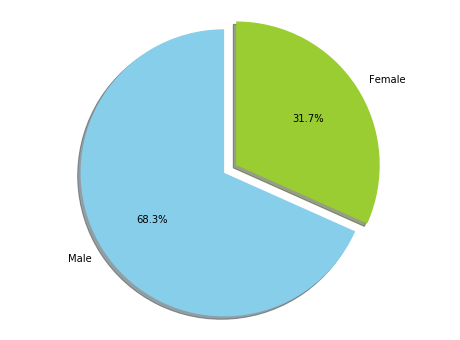

In [8]:
male = len(df[df['sex']==1])
female = len(df[df['sex']==0])

plt.figure(figsize=(8,6))
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue','yellowgreen']
explode=(0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
       shadow=True, startangle=90)

plt.axis('equal')
plt.show()

<h3>2. Chest Pain</h3>

In [9]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

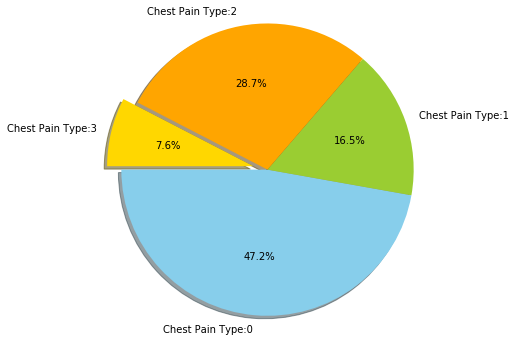

In [10]:
plt.figure(figsize=(8,6))
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp']==0]),len(df[df['cp']==1]),
        len(df[df['cp']==2]),len(df[df['cp']==3]),]
colors = ['skyblue','yellowgreen','orange','gold']
explode=(0,0,0,0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
       shadow=True, startangle=180)

plt.axis('equal')
plt.show()

<h3>3. fbs:(fasting blood sugar > 120 mg/dl)(1:True;0:False</h3>

In [11]:
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

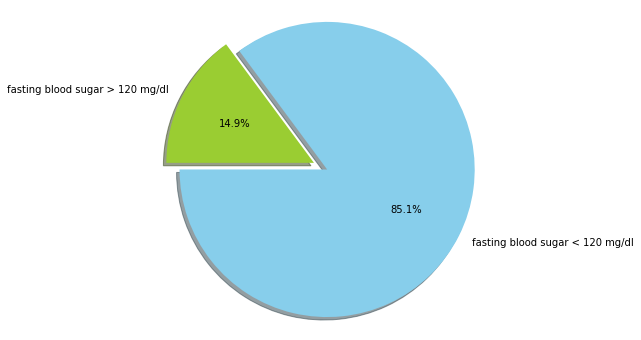

In [12]:
plt.figure(figsize=(8,6))
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'

sizes = [len(df[df['fbs']==0]),len(df[df['fbs']==1])]
colors = ['skyblue','yellowgreen']
explode=(0.1,0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%',
       shadow=True, startangle=180)

plt.axis('equal')
plt.show()

<h3>4. exang: exercise induced angina(1:yes;0:no)</h3>

In [13]:
df.exang.value_counts()

0    204
1     99
Name: exang, dtype: int64

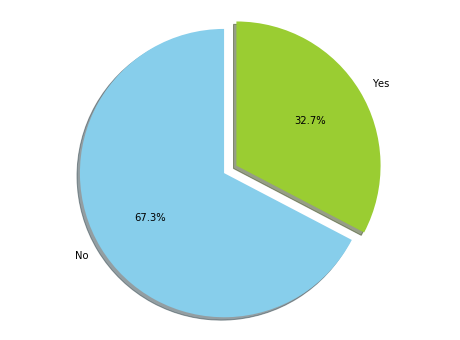

In [14]:
plt.figure(figsize=(8,6))

labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0) 
 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

<h3>Data Analysis</h3>

<h3>1. Heatmap</h3>

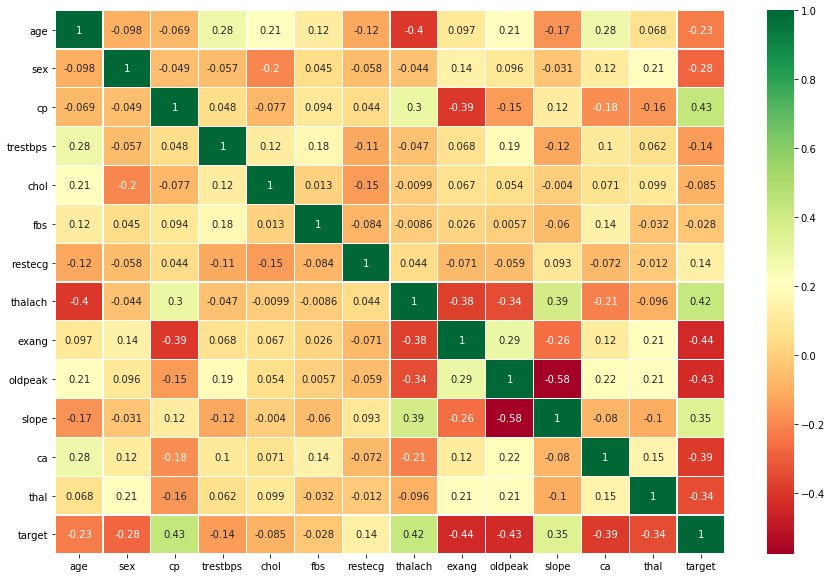

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=.1)

<h3>Plotting the distribution of various attributes</h3>

<h4>1. thalach: maximum heart rate achieved</h4>

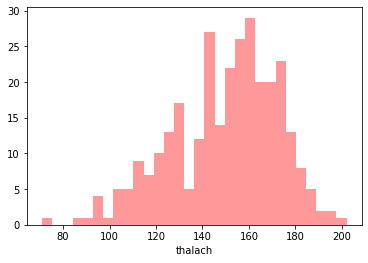

In [16]:
sns.distplot(df['thalach'],kde=False,bins=30,color='red')

<h4>2. chol: serum cholestoral in mg/dl </h4>

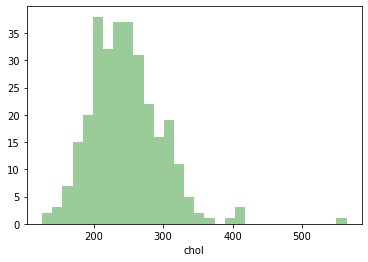

In [17]:
sns.distplot(df['chol'],kde=False,bins=30,color='green')

<h4>3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)</h4>

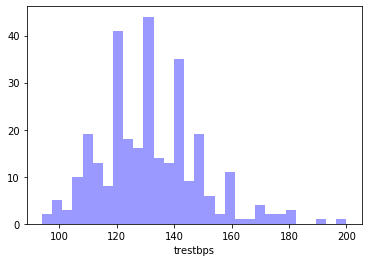

In [18]:
sns.distplot(df['trestbps'],kde=False,bins=30,color='blue')

<h4>4. Number of the people who have heart disease according to age</h4>

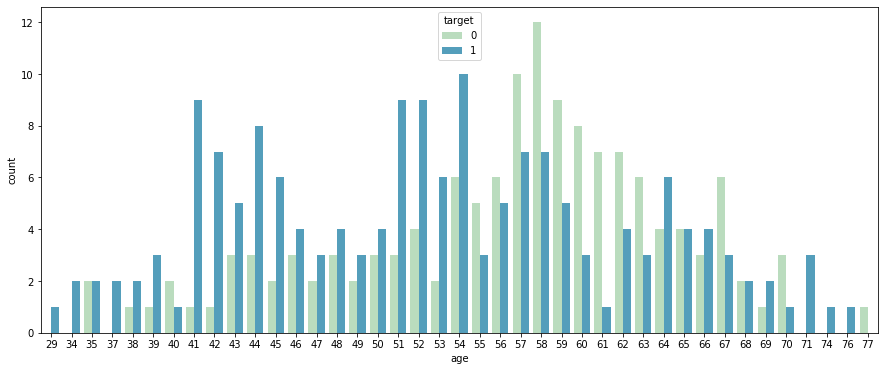

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')

<h4>5. Scatterplot for the thalach vs. chol</h4>

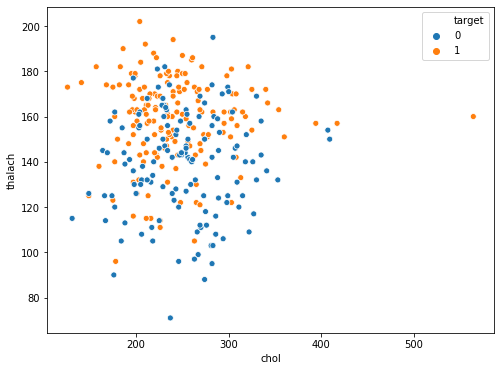

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chol',y='thalach',data=df,hue='target')

<h4>6. Scatter for thalach vs. trestbps</h4>

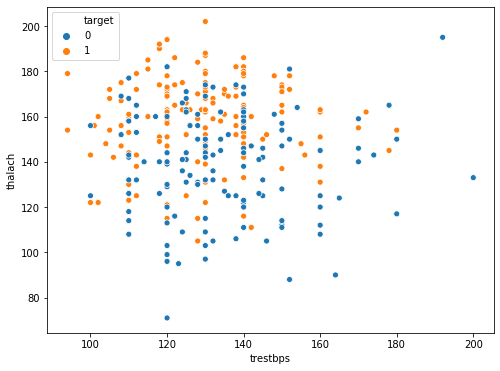

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')

<h3>Checking data set is balanced or not</h3>

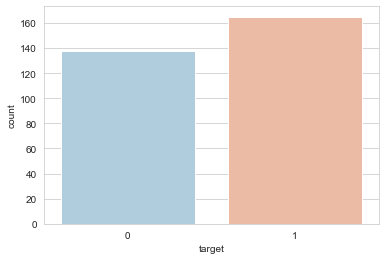

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')

<h3>Making Predictions</h3>
</br></br>
<p>Splitting the dataset into training and test set<p/>

In [23]:
y=df['target']
X=df.drop('target',axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

<h3>1. Logistic Regression</h3>

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()

In [28]:
params ={'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [29]:
log_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
log_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

<p><b>Making Predictions</b><p/>

In [31]:
predict = log_model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score: ",accuracy_score(y_test,predict))

Accuracy Score:  0.8461538461538461


<h3>Confusion matrix</h3>

In [33]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[32,  9],
       [ 5, 45]], dtype=int64)

Text(0.5, 257.44, 'Actual label')

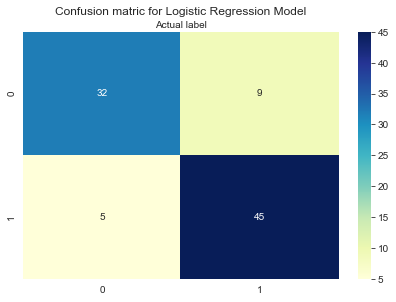

In [34]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',
           fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matric for Logistic Regression Model',y=1.1)
plt.xlabel('Predicted label')
plt.xlabel('Actual label')

<h3>2.  k-Nearest Neighbors Algorithm</h3>

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
params = {'n_neighbors':list(range(1,20)),
    'p':[1, 2, 3, 4,5,6,7,8,9,10],
    'leaf_size':list(range(1,20)),
    'weights':['uniform', 'distance']
         }

In [36]:
model = GridSearchCV(knn,params,cv=3,n_jobs=-1)

In [37]:
model.fit(X_train,y_train)
model.best_params_

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}

<h4>Making prediction</h4>

In [38]:
predict = model.predict(X_test)

<h4>Accuracy Metrics</h4>

In [39]:
print('Accuracy score: ',accuracy_score(y_test,predict))

Accuracy score:  0.8241758241758241


<h4>Confusion Matrix</h4>

In [40]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[32,  9],
       [ 7, 43]], dtype=int64)

Text(0.5, 257.44, 'Actual label')

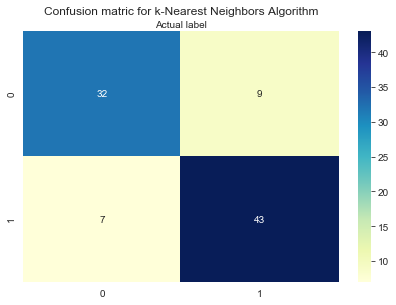

In [41]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',
           fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matric for k-Nearest Neighbors Algorithm',y=1.1)
plt.xlabel('Predicted label')
plt.xlabel('Actual label')

<h3>3. DecisionTreeClassifier</h3>

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dTree=DecisionTreeClassifier(random_state=7)

In [44]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dTree, param_grid=params, n_jobs=-1)

In [45]:
tree_model.fit(X_train,y_train)
# printing best parameters selected through gridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 11}

<h4>Making prediction</h4>

In [46]:
predict = tree_model.predict(X_test)

<h4>Accuracy Metrics</h4>

In [47]:
print('Accuracy score: ',accuracy_score(y_test,predict))

Accuracy score:  0.7362637362637363


<h4>Confusion Matrix</h4>

In [48]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[31, 10],
       [14, 36]], dtype=int64)

Text(0.5, 257.44, 'Actual label')

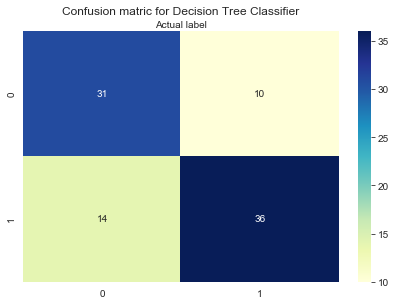

In [49]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',
           fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matric for Decision Tree Classifier',y=1.1)
plt.xlabel('Predicted label')
plt.xlabel('Actual label')